In [15]:
from files.utils.utility_functions import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.serif": ["Palatino"]})

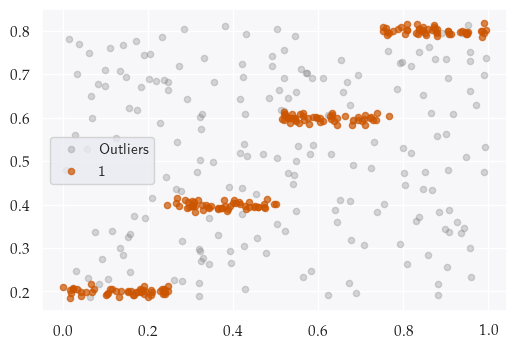

In [16]:
ds, gt = load_dataset_by_name("stair4", base_path=r"/home/catonz/Neural-PreferenceIsolation/")
plot_clusters(gt, ds)

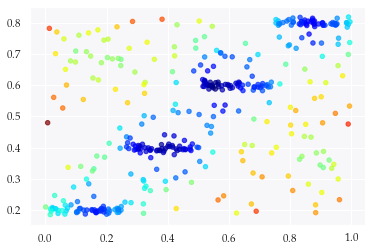

In [17]:
scores = read_dict_json(path=r"/home/catonz/Neural-PreferenceIsolation/server/results/2d/som_55/test_02-09-10-27-27/stair4/som/in_th_0_040/scores.json")
scores = np.array(scores['arr'])

plot(ds, c=scores)

In [28]:
def make_roc(gt, scores, show=True, title="", orig_ax=None, to_plot=True):
    # Pos score is 0 because the higher the score, the more it is an outlier
    fpr, tpr, thr = roc_curve(gt, scores, pos_label=0)
    roc_auc: float = auc(fpr, tpr)
    if not to_plot: return roc_auc, fpr, tpr, thr, None

    lw = 2
    if orig_ax is None:
        fig = plt.figure(dpi=100, figsize=(7, 7))
        ax = fig.add_subplot(111, aspect='equal')
    else:
        ax = orig_ax
        ax.set_aspect("equal")
    plt.plot([0, 0, 1], [0, 1, 1], label="Ideal")
    thr[0] = 1
    ax.plot(fpr[1:], thr[1:], color='mediumseagreen',
            lw=lw, linestyle='--', label="Threshold")
    ax.plot(fpr, tpr, color='darkorange', lw=lw,
            label='Model (AUC = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw,
            linestyle='--', label="Baseline")


    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.yaxis.set_label_position("right")
    # ax.yaxis.tick_right()
    ax.set_title(
        'Receiver Operating Characteristic curve' if title == "" else title)
    ax.legend(loc="lower right")
    # plt.tight_layout()

    if show:
        plt.show()

    return roc_auc, fpr, tpr, thr, fig if orig_ax is None else None

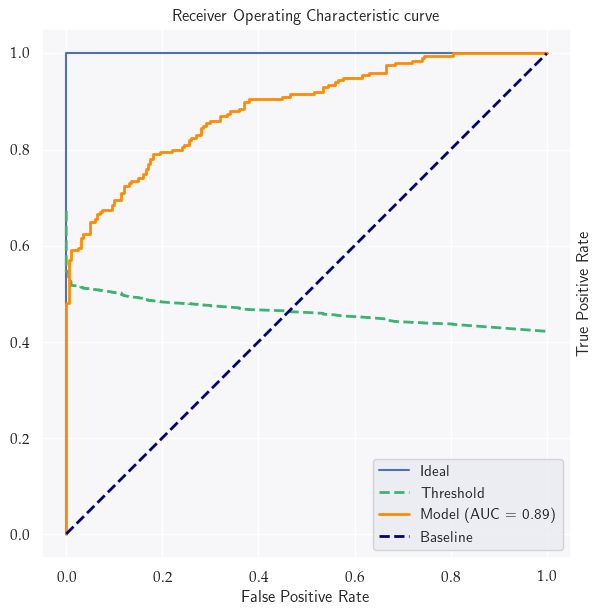

In [29]:
aucs, tpr, fpr, thrs, fig = make_roc(gt, scores)

In [30]:
fig.savefig("roc_curve.svg", bbox_inches="tight")

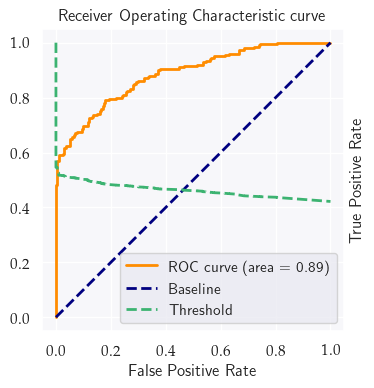

/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/to

In [6]:
from sklearn.metrics import confusion_matrix, classification_report

auc, tpr, fpr, thrs, _ = make_roc(gt, scores)
precs, recalls, f1_scores, supports, accuracys = [], [], [], [], []
for thr in thrs:
    s = scores < thr
    report = classification_report(y_true=gt, y_pred=s, target_names=["Anomalies", "Normal"], output_dict=True)
    precs.append(report["macro avg"]["precision"])
    recalls.append(report["macro avg"]["recall"])
    f1_scores.append(report["macro avg"]["f1-score"])
    supports.append(report["macro avg"]["support"])
    accuracys.append(report["accuracy"])
    

Text(0.5, 1.0, 'Accuracy')

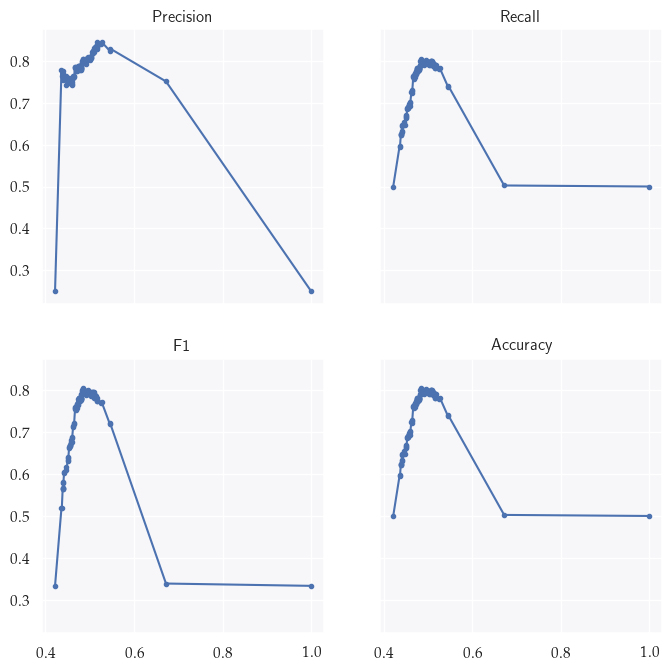

In [7]:
fig, ax = plt.subplots(2, 2, dpi=100, figsize=(8, 8), sharex=True, sharey=True)

ax[0][0].plot(thrs, precs, marker=".")
ax[0][0].set_title("Precision")
ax[0][1].plot(thrs, recalls, marker=".")
ax[0][1].set_title("Recall")
ax[1][0].plot(thrs, f1_scores, marker=".")
ax[1][0].set_title("F1")
ax[1][1].plot(thrs, accuracys, marker=".")
ax[1][1].set_title("Accuracy")

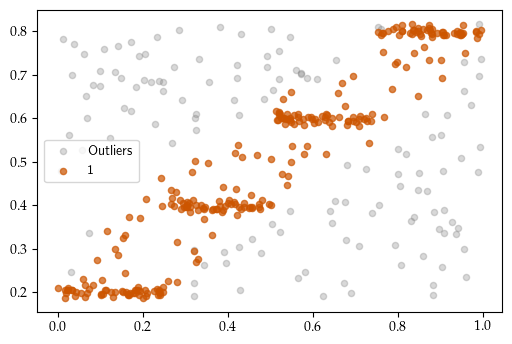

In [120]:
plot_clusters(scores<0.55, ds)

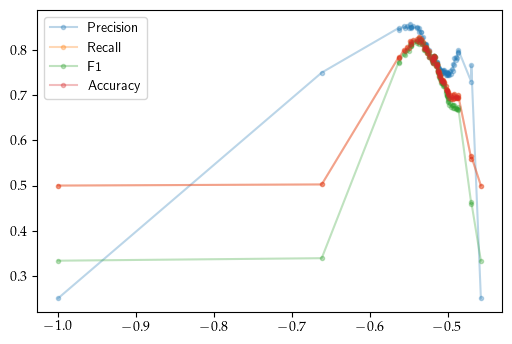

In [91]:
plt.figure(dpi=100)
plt.plot(-thrs, precs, marker=".", label="Precision", alpha=0.3)
plt.plot(-thrs, recalls, marker=".", label="Recall", alpha=0.3)
plt.plot(-thrs, f1_scores, marker=".", label="F1", alpha=0.3)
plt.plot(-thrs, accuracys, marker=".", label="Accuracy", alpha=0.3)
plt.legend()

In [85]:
np.argmax(precs), np.argmax(recalls), np.argmax(f1_scores), np.argmax(accuracys)

(8, 16, 16, 16)

In [86]:
thrs[16], thrs[8]

(0.5365376736708027, 0.5480629488024613)

In [111]:
s = (scores<thrs[8])*1
print(confusion_matrix(gt, s, normalize='all'))
print(classification_report(y_true=gt, y_pred=s))

[[0.3275 0.1725]
 [0.0075 0.4925]]
              precision    recall  f1-score   support

           0       0.98      0.66      0.78       200
           1       0.74      0.98      0.85       200

    accuracy                           0.82       400
   macro avg       0.86      0.82      0.81       400
weighted avg       0.86      0.82      0.81       400

